In [12]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [13]:
class LRegression:
    def __init__(self, x, y, color, title, filename, xlabel, ylabel, dominio, type):
        self.x = x
        self.y = y
        self.x_mean = stat.mean(x)
        self.y_mean = stat.mean(y)

        self.color = color
        self.title = title
        self.filename = filename
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.dominio = dominio
        self.type = type
    
    def get(self):
        #definicao do coeficiente angular (a):
        a_def = 0
        for i in range(len(self.x)):
            a_def += ((self.x[i]-self.x_mean) * (self.y[i]-self.y_mean))
        a_div = 0
        for i in range(len(self.x)):
            a_div += pow((self.x[i] - self.x_mean), 2)
        a = (a_def/a_div)
        b = self.y_mean - (self.x_mean * a) #definicao do coeficiente linear (b)
        
        #incerteza de Y
        incY = 0
        for i in range(len(self.x)):
            incY += pow((self.y[i] - (a * self.x[i] + b)), 2)
        
        incY *= (1/(len(self.x)-2))
        incY = pow(incY, 0.5)
    	
        #inceteza de a:
        incA = 0
        incA = pow(a_div, -1)
        incA = pow(incA, 0.5)
        incA *= incY
        
        #incerteza de b:
        incB = 0
        for i in range(len(self.x)):
            incB += (pow(self.x[i], 2))

        incB*= (1/len(self.x))
        incB = incB/a_div
        incB = pow(incB, 0.5)
        incB*= incY

        y=[]
        for i in range(len(self.dominio)):
            y.append(a*self.dominio[i])
       
        self.Y = y
        self.a = a
        return a, b, incA, incB, incY
    
    def plot_reg(self):
        #plt.plot(self.x, self.y, 'k^', label='Dados coletados')
        plt.plot(self.dominio, self.Y, self.color, label=f'Regressão linear ({self.type}) (y = {self.a :.6f}x)')
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.grid(True)
        plt.savefig(self.filename, dpi=130, edgecolor="#04253a")


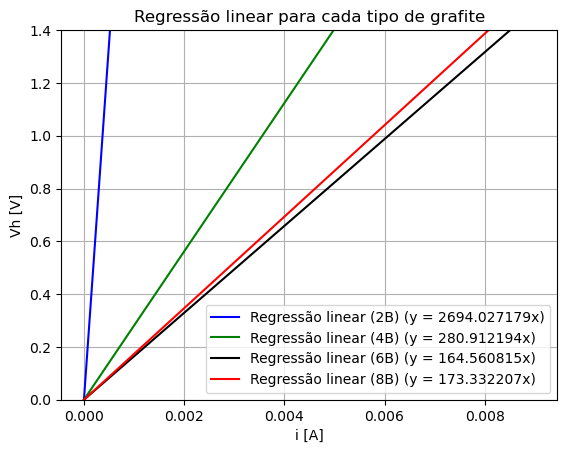

In [14]:
# 2b
VH2b = [87.5, 169.9, 250, 333, 412, 497, 600, 714, 790, 882] #mili
i2b  = [31, 60, 90, 120, 150, 185, 215, 259, 292, 327] #micro

# 4b
VH4b = [39.1, 76.9, 115.5, 154.3, 192.4, 231, 270, 308, 347, 386] #mili
i4b  = [131, 262, 397, 528, 662, 802, 940, 1079, 1218, 1371] #micro

for i in range(len(i2b)):
    VH2b[i]*=pow(10, -3)
    VH4b[i]*=pow(10, -3)

    i2b[i]*=pow(10, -6)
    i4b[i]*=pow(10, -6)
# 6b
VH6b = [80, 130, 180, 220, 322, 433, 513, 588, 666, 750] #mili
i6b  = [0.52, 1.34 , 1.82, 2.2, 2.44, 2.97, 3.48, 3.99, 4.48, 4.95] #mili

# 8b
VH8b = [130, 256, 386, 515, 647, 776, 910, 1046, 1183, 1325] #mili
i8b  = [0.73, 1.5, 2.25, 2.99, 3.67, 4.43, 5.22, 5.99, 6.81, 7.7] #mili

for i in range(len(i6b)):
    VH6b[i]*=pow(10, -3)
    VH8b[i]*=pow(10, -3)

    i6b[i]*=pow(10, -3)
    i8b[i]*=pow(10, -3)

I = np.arange(0, 0.010, 0.001)

reg2b = LRegression(i2b, VH2b, 'b-', "Regressão linear", 'exp8-graph.jpg', 'i [A]', 'Vh [V]', I, "2B")
reg4b = LRegression(i4b, VH4b, 'g-', "Regressão linear", 'exp8-graph.jpg', 'i [A]', 'Vh [V]', I, "4B")
reg6b = LRegression(i6b, VH6b, 'k-', "Regressão linear", 'exp8-graph.jpg', 'i [A]', 'Vh [V]', I, "6B")
reg8b = LRegression(i8b, VH8b, 'r-', "Regressão linear para cada tipo de grafite", 'exp8-graph.jpg', 'i [A]', 'Vh [V]', I, "8B")

a2b, b2b, incA2b, incB2b, incY2b = reg2b.get()
a4b, b4b, incA4b, incB4b, incY4b = reg4b.get()
a6b, b6b, incA6b, incB6b, incY6b = reg6b.get()
a8b, b8b, incA8b, incB8b, incY8b = reg8b.get()

plt.ylim([0, 1.4])

reg2b.plot_reg()
reg4b.plot_reg()
reg6b.plot_reg()
reg8b.plot_reg()


plt.show()

In [25]:
# Encontrar B/n, em que, Vh = (B/n) * (1/eL)

L = 0.11 * pow(10, -3)

R2b = a2b * L
R4b = a4b * L
R6b = a6b * L
R8b = a8b * L

incR2b = incA2b * L
incR4b = incA4b * L
incR6b = incA6b * L
incR8b = incA8b * L

print(f'(B/ne) 2B = {R2b :.3f} +- {incR2b :.3f} [Ω.m]')
print(f'(B/ne) 4B = {R4b :.4f} +- {incR4b :.4f} [Ω.m]')
print(f'(B/ne) 6B = {R6b :.3f} +- {incR6b :.3f} [Ω.m]')
print(f'(B/ne) 8B = {R8b :.4f} +- {incR8b :.4f} [Ω.m]')

(B/ne) 2B = 0.296 +- 0.003 [Ω.m]
(B/ne) 4B = 0.0309 +- 0.0002 [Ω.m]
(B/ne) 6B = 0.018 +- 0.001 [Ω.m]
(B/ne) 8B = 0.0191 +- 0.0001 [Ω.m]
